---
# Esercitazione 2
---
## Esercizio 2.1 - Integrazione con il metodo Monte Carlo
In questa esercitazione si vuole stimare il valore del seguente integrale: $I = \int_0^1 \dfrac{\pi}{2}\cos(\dfrac{\pi}{2} x) dx = 1$ tramite il metodo Monte Carlo.

Questa integrazione viene svolta tramite due metodi di calcolo, nel primo si estraggono numeri pseudocasuali da distribuzione uniforme e nel secondo da distribuzione non uniforme. $\\$

### Punto 1 - Primo metodo
Nel primo caso l'approssimazione dell'integrale di una funzione $f(x)$ nell'intervallo $[a,b]$ è ottenuta dalla seguente relazione:

$$I \simeq (b-a) \cdot \dfrac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$

dove $N$ è il numero totale di valori pseudocasuali $x_i$ estratti dallla distribuzione uniforme nell'intervallo d'integrazione. Si può dunque notare che la stima dell'integrale è la media della variabile casuale  $(b-a) \cdot f(x_{i})$. Nel codice C++ per la generazione dati sarà dunque sufficiente generare un random dataset di questa variabile e poi calcolarne la media a blocchi.

Di seguito viene riportato il risultato della stima ottenuto generando $M = 10^6$ numeri casuali. Come di consueto, gli $M$ numeri sono divisi in blocchi ($N=100$ blocchi) e viene riportata la media cumulativa al crescere dei blocchi con relativo errore.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il primo metodo
ave_int, err_int = np.loadtxt("./Dati/es2-1-1.txt", unpack= True, usecols=(0,1), skiprows=1)

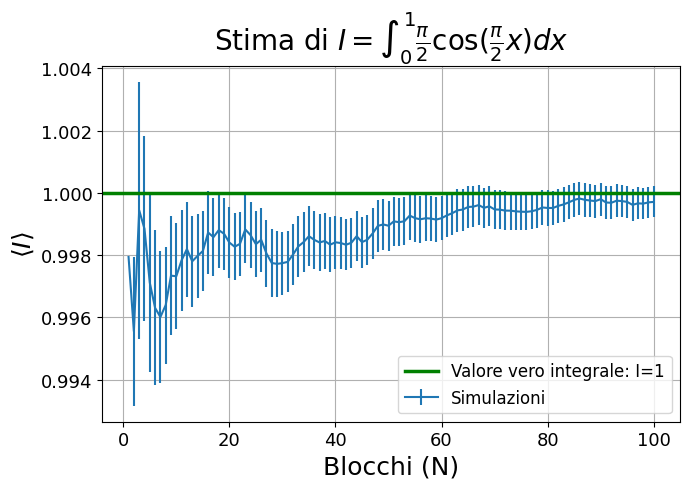

Valor medio integrale dai dati simulati:  0.9997 +\- 0.0005
Livello di confidenza con il valore atteso:  -0.58 sigma


In [2]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int, yerr=err_int, label = "Simulazioni") #plotto la media cumulativa dell'integrale con errore

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'Valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

print("Valor medio integrale dai dati simulati: ", round(ave_int[-1],4), "+\-", round(err_int[-1],4))
print("Livello di confidenza con il valore atteso: ",round((ave_int[-1] - 1)/err_int[-1],2), "sigma")

Dai risultati ottenuti si evince che, dopo $10^6$ estrazioni, il calcolo dell'integrale con il metodo Monte Carlo ha avuto esito positivo, con un livello di confidenza di $0.6\sigma$.

### Punto 2 - Secondo metodo
Nel secondo metodo, l'estrazione delle variabili casuali avviene secondo una distribuzione diversa da quella uniforme e che approssima la funzione da integrare, in questo modo dovremmo aspettarci un risultato più accurato. $\\$
Possiamo scegliere la funzione $p(x)$ che approssima l'integranda in diversi modi, ad esempio considerando un'approssimazione lineare. A questo proposito, procediamo a calcolare uno sviluppo in serie di Taylor al primo ordine, nell'intorno di $1$, ciò per garantire che la retta approssimante utilizzata sia definita positiva in tutto l'intervallo d'integrazione:

$$\dfrac{\pi}{2}\cos(\dfrac{\pi}{2}x) = 0 - \dfrac{\pi^2}{4} \cdot 1 \cdot \left(x-1\right) + o(\left(x-1\right)^2) \approx - \dfrac{\pi^2}{4} \left(x-1\right)$$

Dato che $p(x)$ dev'essere una distribuzione di probabilità, dev'essere normalizzata a $1$:

$$1=\int_0^1 p(x) dx = - N \int_0^1 \dfrac{\pi^2}{4} \left(x-1\right) dx \Leftrightarrow N = \dfrac{\pi^2}{8}$$

Dopo averla normalizzata si ottiene la seguente pdf: $$p(x) = 2 \left(1-x\right)$$
Se si estraggono numeri casuali secondo questa distribuzione, l'integrale da calcolare diventa:

$$\int_0^1 p(x) \cdot \dfrac{f(x)}{p(x)} dx = \int_0^1 2 \left(1-x\right) \cdot \dfrac{\dfrac{\pi}{2}\cos(\dfrac{\pi}{2} x)}{2\left(1-x\right)} dx $$

Ora l'approssimazione dell'integrale è: 

$$I \simeq \dfrac{1}{N} \sum_{i=1}^{N} \dfrac{f(x_{i})}{p(x_{i})} $$

Abbiamo quindi una "nuova" funzione integranda data dal rapporto tra la vecchia integranda e la distribuzione approssimante, sta volta valutata con valori $x$ che seguono la distribuzione approssimante. $\\$
Per generare numeri pseudocasuali che seguono la distribuzione $p(x)$ si utilizza il metodo dell'inversa della cumulativa. Si dimostra che se la cumulativa $F(x)$ è invertibile, allora $x=F^{-1}(y)$ segue la distribuzione $p(x)$, con $y$ estratto uniformemente in $[0,1)$.

$$ y = F(x) = \int_0^x 2(1-x') dx' = 2x-x^2 = 1-(x-1)^2 \Leftrightarrow x = 1 \pm \sqrt{1-y} $$

Solo la soluzione con "-" è ammessa in quanto $x \in [0,1]$, la soluzione con "+" invece esce da questo intervallo. Si estraggono dunque $10^{6}$ valori $y_{i}$ pseudocasuali che seguono una distribuzione uniforme in $[0,1)$. Il valore $x_i$ corrispondente trovato con $x_i=1-\sqrt{1-y_i}$ segue la distribuzione $p(x)$; a questo punto la variabile di cui calcolare la media a blocchi è $\dfrac{f(x_{i})}{p(x_{i})}$. $\\$

Di seguito viene riportato il risultato ottenuto della stima, sempre riportando la media cumulativa al variare del numero dei $100$ blocchi in cui sono divisi.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il secondo metodo
ave_int2, err_int2 = np.loadtxt("./Dati/es2-1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

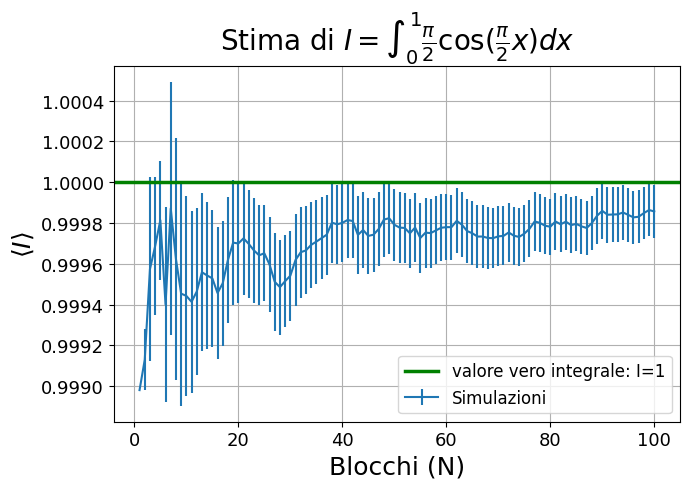

Valor medio integrale dai dati simulati:  0.99986 +\- 0.00013
Livello di confidenza con il valore atteso:  -1.12 sigma


In [4]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int2, yerr = err_int2, label = "Simulazioni") #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

print("Valor medio integrale dai dati simulati: ", round(ave_int2[-1],5), "+\-", round(err_int2[-1],5))
print("Livello di confidenza con il valore atteso: ",round((ave_int2[-1] - 1)/err_int2[-1],2), "sigma")

Si nota che il livello di confidenza in questo caso è inferiore, questo è dovuto al fatto che l'errore è molto minore del primo metodo, quindi influenza maggiormente il CL. Per mostrare ciò in modo più intuitivo vengono ora mostrati sullo stesso grafico.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il secondo metodo
ave_int, err_int = np.loadtxt("./Dati/es2-1-1.txt", unpack= True, usecols=(0,1), skiprows=1)
ave_int2, err_int2 = np.loadtxt("./Dati/es2-1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

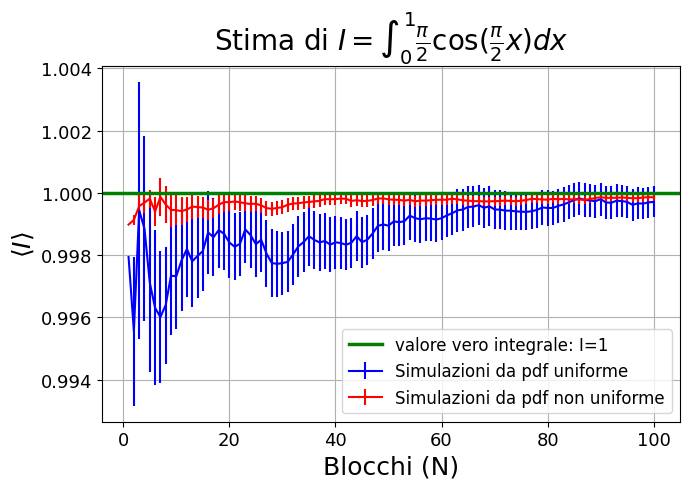

In [6]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int, yerr = err_int, label = "Simulazioni da pdf uniforme", color = 'blue') #plotto la media cumulativa
plt.errorbar(x, ave_int2, yerr = err_int2, label = "Simulazioni da pdf non uniforme", color = 'red') #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Con questa visualizzazione è possibile notare che il secondo metodo converge più rapidamente al valore vero dell'integrale e che è soggetto a una deviazione standard di molto inferiore (circa $5$ volte).

#### Osservazione
Entrambi i metodi prevedono la generazione di un dataset di numeri pseudocasuali con distribuzione uniforme, si potrebbe dunque pensare di confrontare i risultati a partire dallo $\textit{stesso dataset}$. Tuttavia, nella prima esercitazione è stato verificato statisticamente che il generatore di numeri pseudocasuali è buono, pertando la differenza che si otterrebbe con quanto sopra riportato (dataset uniformi diversi tra i due metodi) sarebbe totalmente trascurabile.

## Esercizio 2.2 - Random Walks
In questo esercizio si vuole calcolare $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, la media del quadrato della posizione finale di un Random Walk di $N$ passi lunghi $a=1$, che parte dal centro e avanza nello spazio in modo casuale. L'esercizio è diviso in due punti, nel primo si considerano Random Walks che avanzano nelle sole tre direzioni spaziali, ovvero sono RW discreti, mentre nel secondo punto avanzano in direzioni continue nello spazio. $\\$
In entrambi i casi i RW sono di $N=100$ passi e si svolgono $M=10^{6}$ simulazioni. In questo modo, dividendo le simulazioni per i $100$ passi, si ottengono $10^{4}$ Random Walks da $100$ passi.$\\$
Per ogni RW si calcola la posizione finale raggiunta dopo $N=1,2,3,...,100$ passi, per poi dividere queste posizioni in $100$ blocchi, in modo che ogni blocco raccolga le posizioni al variare dei passi di $10^2$ Random Walks. $\\$
Per ogni blocco si calcola la distanza al quadrato raggiunta al passo i-esimo, per poi estrarne una media e una deviazione standard tra i blocchi. $\\$
Il risultato ottenuto è un plot della radice di questa distanza quadratica media, al variare del numero di passi e con relativo errore (calcolato da propagazione degli errori). $\\$

### Punto 1 - Random Walks discreti
Nel primo punto le direzioni casuali sono discrete, e rappresentano un singolo passo di lunghezza $a=1$ nelle tre possibili direzioni spaziali, considerando tutti e 6 i versi possibili.

Il risultato viene fittato con una funzione del tipo $f(N) = k\cdot \sqrt{N}$ con $N$ il numero di passi, ovvero la funzione dell'andamento atteso. Il risultato è riportato di seguito.

In [7]:
# carico il file con le direzione 3D casuali, non posso più usare loadtxt di numpy
# perché ho generato delle stringhe

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # per il fit
import scipy.stats as stats # per il calcolo della cumulativa del chi quadro
import numpy as np

# carico i dati della distanza al variare dei passi con errore
r_n1, err_rn1 = np.loadtxt("./Dati/es2-2-1.txt", unpack= True, usecols=(0,1), skiprows=1)

C:\Users\teote\AppData\Local\Temp\ipykernel_2532\3720939699.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")


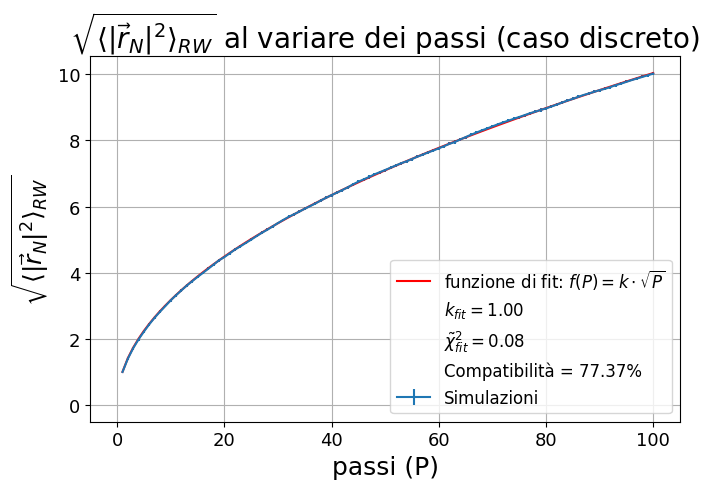

In [8]:
P = len(r_n1)            # numero di passi totali
x = np.arange(1, P+1)   # x del grafico, numero di passi totali: [1,2,...,P]

plt.figure(figsize=(7, 5))
plt.title(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare dei passi (caso discreto)",fontsize=20)

plt.errorbar(x, r_n1, yerr= err_rn1, label = "Simulazioni")

# Funzione per il fit, k è il parametro da stimare
def fit_func(x, k):
    return k * np.sqrt(x)

# Fit dei dati
k,*useless = curve_fit(fit_func, x, r_n1)

# Plot del fit
plt.plot(x, fit_func(x, *k), 'r-', label='funzione di fit: $f(P) = k\cdot \sqrt{P}$')
plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")

# Ora calcolo il chi quadro del fit, non considero il primo dato perché ha varianza nulla visto che è calcolato da un solo passo
y_fit = fit_func(x, *k)
residui = (r_n1[1:] - y_fit[1:])/err_rn1[1:]
chi_quadro = np.sum(residui**2)

GDL = len(k) # gradi di libertà ovvero 1

# calcolo il chi quadro ridotto dividendo il chi quadro per N-1
# (in cui N=99 perché ho tolto il primo dato e la sottrazione per 1 è perché ho un solo parametro libero k)

chi_ridotto = chi_quadro/(len(residui)-GDL)
plt.plot(0,0,linewidth=1, label=r'$\tilde{\chi}^{2}_{fit} = %.2f $' %(chi_ridotto), color="white")

p_val = 1 - stats.chi2.cdf(chi_ridotto*GDL, GDL)
plt.plot(0,0,linewidth=1, label=r'Compatibilità = %.2f%%' %(p_val*100), color="white")

plt.xlabel(r"passi (P)", fontsize=18)
plt.ylabel(r"$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
plt.show()

Come previsto, l'andamento osservato è compatibile con la funzione attesa, con una compatibilità (da probabilità estratta dalla distribuzione $\chi^2$) del $77.4\%$.

### Punto 2 - Random Walks continui
Nel secondo punto si svolge la stessa analisi fatta in precedenza, questa volta considerando passi in ogni direzione spaziale. Genero ancora $10^{6}$ simulazioni divise in $100$ blocchi. Per ogni blocco ci sono dunque $10^4$ passi. $\\$

La direzione casuale presa ad ogni step è rappresentata in coordinate sferiche, dove in questo caso i dati casuali (distribuiti uniformemente) sono costituiti dalla coppia di valori $\theta \in [0, \pi]$ e $\phi \in [0, 2\pi]$, angoli delle coordinate sferiche. Si ricorda che $\phi$ è distribuito uniformemente, mentre per $\theta$ è necessario procedere tramite metodo dell'inversa della cumulativa, questo per ottenere una distribuzione di direzioni equiprobabile per ogni infinitesimo di angolo solido.$\\$

Anche in questo caso il risultato viene fittato con una funzione del tipo $f(N) = k\cdot \sqrt{N}$ con $N$ il numero di passi.

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # per il fit
import scipy.stats as stats # per il calcolo della cumulativa del chi quadro
import numpy as np

# carico i dati della distanza al variare dei passi con errore
r_n, err_rn = np.loadtxt("./Dati/es2-2-2.txt", unpack= True, usecols=(0,1), skiprows=1)

C:\Users\teote\AppData\Local\Temp\ipykernel_2532\3652224259.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")


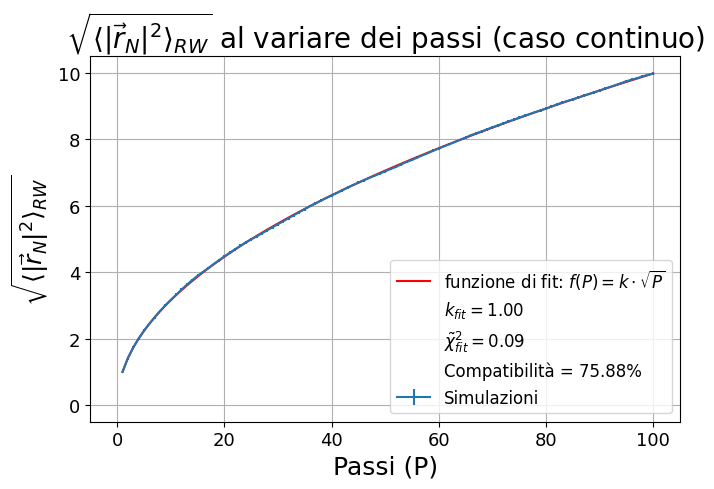

In [10]:
P = len(r_n)            # numero di passi totali
x = np.arange(1, P+1)   # x del grafico, numero di passi totali: [1,2,...,P]

plt.figure(figsize=(7, 5))
plt.title(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare dei passi (caso continuo)",fontsize=20)
plt.errorbar(x, r_n, yerr= err_rn, label = "Simulazioni")

# Funzione per il fit, k è il parametro da stimare
def fit_func(x, k):
    return k * np.sqrt(x)

# Fit dei dati
k,*useless = curve_fit(fit_func, x, r_n)

# Plot del fit
plt.plot(x, fit_func(x, *k), 'r-', label='funzione di fit: $f(P) = k\cdot \sqrt{P}$')
plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")

# Ora calcolo il chi quadro del fit, non considero il primo dato perché ha varianza nulla visto che è calcolato da un solo passo
y_fit = fit_func(x, *k)
residui = (r_n[1:] - y_fit[1:])/err_rn[1:]
chi_quadro = np.sum(residui**2)

GDL = len(k) # gradi di libertà ovvero 1

# calcolo il chi quadro ridotto dividendo il chi quadro per N-1
# (in cui N=99 perché ho tolto il primo dato e la sottrazione per 1 è perché ho un solo parametro libero k)

chi_ridotto = chi_quadro/(len(residui)-GDL)
plt.plot(0,0,linewidth=1, label=r'$\tilde{\chi}^{2}_{fit} = %.2f $' %(chi_ridotto), color="white")

p_val = 1 - stats.chi2.cdf(chi_ridotto*GDL, GDL)
plt.plot(0,0,linewidth=1, label=r'Compatibilità = %.2f%%' %(p_val*100), color="white")


plt.xlabel(r"Passi (P)", fontsize=18)
plt.ylabel(r"$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
plt.show()

### Considerazioni sui risultati ottenuti
Si osserva qualitativamente dalla funzione di fit rossa e quantitativamente dai valori di $\tilde{\chi}^{2}$ ottenuti nei due casi che la distanza media raggiunta dopo $N$ passi segue effettivamente un andamento del tipo $\sim k\cdot \sqrt{N}$. Con un solo grado di libertà ($k$), si sono ottenuti seguenti valori di compatibilità nei due casi (direzioni discrete e continue, rispettivamente): $\\$

$\tilde{\chi}^{2}_{1} = 0.08 \Rightarrow $ compatibile al $77.4\%$ con $k=1.0$ $\\$
$\tilde{\chi}^{2}_{2} = 0.09 \Rightarrow $ compatibile al $75.9\%$ con $k=1.0$

I risultati ottenuti confermano l'andamento aspettato per entrambi i Random Walks.